In [1]:
#import the dataset 
from keras.datasets import fashion_mnist

In [2]:
#import the required libraries 
from matplotlib import pyplot
import numpy as np

In [3]:
#load the data into train and test 
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
#pyplot.imshow(X_train[2])

In [4]:
noOfImages = X_train.shape[0]
X_train = (1.0/255)*np.array([X_train[i].flatten() for i in range(0,noOfImages)])
X_train = np.array([X_train[i].flatten() for i in range(0,noOfImages)])
noOftestImages= X_test.shape[0]
X_test =(1.0/255)*np.array([X_test[i].flatten() for i in range(0,noOftestImages)])
X_test =np.array([X_test[i].flatten() for i in range(0,noOftestImages)])
print(X_test.shape)


(10000, 784)


In [5]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 

In [6]:
def softmax(X):
  X=np.exp(X)
  sum=np.sum(X,axis=0)
  return X/sum 


In [7]:
def sigmoidFunc(X):

  return 1.0/(1.0+np.exp(-X))
  #return res

In [8]:
def gDash(X):
  return sigmoidFunc(X)*(1-sigmoidFunc(X))

In [9]:
def forwardPropagation(X,parameters):
  preactivation={}
  activation={}
  activation['h0']=X.T
  #print(activation['h0'].shape)
  for k in range(1,noOfHiddenLayers+1):
    preactivation['a'+str(k)]=np.dot(parameters['W'+str(k)],activation['h'+str(k-1)])+parameters['b'+str(k)]
    activation['h'+str(k)]=sigmoidFunc(preactivation['a'+str(k)])
    #print('h size '+str(k),activation['h'+str(k)].shape)
    #print('a'+str(k),preactivation['a'+str(k)])
  preactivation['a'+str(noOfHiddenLayers+1)]=np.dot(parameters['W'+str(noOfHiddenLayers+1)],activation['h'+str(noOfHiddenLayers)])+parameters['b'+str(noOfHiddenLayers+1)]
  y=softmax(preactivation['a'+str(noOfHiddenLayers+1)])    
  #print("a last" ,preactivation['a'+str(noOfHiddenLayers+1)])
  return (preactivation,activation,y)



In [10]:
def backPropagation(parameters,activation,preactivation,yhat,X,y_train):
  grads={}
  eIndicator=np.zeros((10,X.shape[0]))
  eIndicator[y_train,np.arange(X.shape[0])]=1
  #print(y_train)
  #print(eIndicator)
  #print(eIndicator.shape)
  grads['a'+str(noOfHiddenLayers+1)]= -(eIndicator-yhat)
  #print(grads['a'+str(noOfHiddenLayers+1)].shape)
  for j in range(noOfHiddenLayers+1,0,-1):
    grads['W'+str(j)]= np.dot(grads['a'+str(j)],activation['h'+str(j-1)].T)
    #grads['W'+str(j)]= np.dot(activation['h'+str(j-1)],grads['a'+str(j)].T).T
    #print(grads['W'+str(j)].shape)
    grads['b'+str(j)]= np.sum(grads['a'+str(j)],axis=1,keepdims=True)
    ###grads['h'+str(j-1)]=np.dot(grads['W'+str(j)].T,grads['a'+str(j)]) #error
    grads['h'+str(j-1)]=np.dot(parameters['W'+str(j)].T,grads['a'+str(j)])
    #print('h'+str(j-1),grads['h'+str(j-1)].shape)
    #print('a'+str(j-1),preactivation['a'+str(j-1)].shape)
    if (j!=1):
      grads['a'+str(j-1)]=grads['h'+str(j-1)]*gDash(preactivation['a'+str(j-1)])
  return grads
#backPropagation()

In [11]:
def Loss(yhat,y_train,X):
  eIndicator=np.zeros((10,X.shape[0]))
  eIndicator[y_train,np.arange(X.shape[0])]=1
  eIndicator=eIndicator*yhat
  eIndicator=eIndicator.sum(axis=0)
  eIndicator=np.log(eIndicator)
  return -sum(eIndicator)


784
iter  0


C:\Users\Arun-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\Arun-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10
iter  11
iter  12
iter  13
iter  14
iter  15
iter  16
iter  17
iter  18
iter  19
iter  20
iter  21
iter  22
iter  23
iter  24
iter  25
iter  26
iter  27
iter  28
iter  29
iter  30
iter  31
iter  32
iter  33
iter  34
iter  35
iter  36
iter  37
iter  38
iter  39
iter  40
iter  41
iter  42
iter  43
iter  44
iter  45
iter  46
iter  47
iter  48
iter  49
iter  50
iter  51
iter  52
iter  53
iter  54
iter  55
iter  56
iter  57
iter  58
iter  59
iter  60
iter  61
iter  62
iter  63
iter  64
iter  65
iter  66
iter  67
iter  68
iter  69
iter  70
iter  71
iter  72
iter  73
iter  74
iter  75
iter  76
iter  77
iter  78
iter  79
iter  80
iter  81
iter  82
iter  83
iter  84
iter  85
iter  86
iter  87
iter  88
iter  89
iter  90
iter  91
iter  92
iter  93
iter  94
iter  95
iter  96
iter  97
iter  98
iter  99
iter  100
iter  101
iter  102
iter  103
iter  104
iter  105
iter  106
iter  107
iter  108
iter  109
iter  110
iter  11

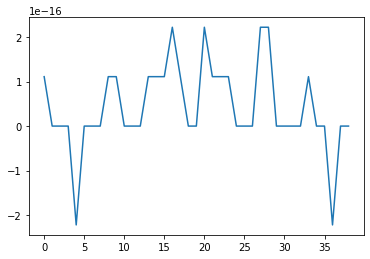

In [12]:
noOfHiddenLayers=2
l=10 #output classes
noOfneuronsEach=[120,20]
inputNeuronSize=X_train.shape[1]
print(inputNeuronSize)
parameters={}
eta=1
#eta=0.1
#input W
loss = []
def gradDescent():
  #batchSize=1000
  iterations=300
  #initialization
  parameters['W'+str(1)] =np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[0], inputNeuronSize))
  parameters['b'+str(1)]= np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[0],1))
  #parameters['W'+str(1)] =0+1.5*np.random.randn(noOfneuronsEach[0], inputNeuronSize)
  #parameters['b'+str(1)]= 0+1.5*np.random.randn(noOfneuronsEach[0],1)
  for i in range(2,noOfHiddenLayers+1):
    parameters['W'+str(i)] = np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[i-1], noOfneuronsEach[i-2]))
    parameters['b'+str(i)]= np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[i-1],1))
    #parameters['W'+str(i)] = 0+1.5*np.random.randn(noOfneuronsEach[i-1], noOfneuronsEach[i-2])
    #parameters['b'+str(i)]= 0+1.5*np.random.randn(noOfneuronsEach[i-1],1)
  #Output W
  parameters['W'+str(noOfHiddenLayers+1)] = np.random.uniform(low=-0.5,high=0.5,size=(l, noOfneuronsEach[-1]))
  parameters['b'+str(noOfHiddenLayers+1)]= np.random.uniform(low=-0.5,high=0.5,size=(l,1))
  #parameters['W'+str(noOfHiddenLayers+1)] = 0+1.5*np.random.randn(l, noOfneuronsEach[-1])
  #parameters['b'+str(noOfHiddenLayers+1)]= 0+1.5*np.random.randn(l,1)
  t=0  
  while(t < iterations):
    print("iter ",t)
    #print(parameters)
    #mini=0
    #while(mini<(noOfImages/batchSize)):
      #print("Epoch",mini)
      #X_mini=X_train[(mini*batchSize):((mini+1)*batchSize-1)]
      #y_mini=y_train[(mini*batchSize):((mini+1)*batchSize-1)]
    # shuffle the data
    #X_train = np.random.shuffle(X_train)
    for x in X_train:
        batch = np.array([x])
        preactivation,activation,yhat=forwardPropagation(batch,parameters)
          #print(preactivation)
          #print(activation)
        #print("y_pred",yhat)
        #print("loss",Loss(yhat,y_train,X_train))
        loss.append(Loss(yhat,y_train,batch))
        gradients=backPropagation(parameters,activation,preactivation,yhat,batch,y_train)
        #print("gradients",gradients)
        for i in range(1,noOfHiddenLayers+2):
          parameters['W'+str(i)] -=  eta*gradients['W'+str(i)]#parameters['W'+str(i)] -=  eta*(1.0/X_train.shape[0])*gradients['W'+str(i)]
          parameters['b'+str(i)] -= eta*gradients['b'+str(i)]#parameters['b'+str(i)] -= eta*(1.0/X_train.shape[0])*gradients['b'+str(i)]
    #mini+=1
    #_,_,yhat=forwardPropagation(X_train,parameters)
    
    #print(yhat)
    t+=1
gradDescent()
pyplot.plot(loss)
print(parameters)
#print(gradients)



In [ ]:
def predict(X_test,y_test):
  _,_,y_hat=forwardPropagation(X_test,parameters)
  y_hat=y_hat.argmax(axis=0)
  correctPred=np.sum(y_hat==y_test)
  print("Accuracy is ", correctPred/X_test.shape[0]*100,"%")
  return (y_hat,correctPred)
print(predict(X_train,y_train))
print(predict(X_test,y_test))